In [1]:
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Dense
from keras.layers.core import Dense, Dropout, Activation, Flatten, Reshape
from keras.layers.convolutional import Convolution2D, MaxPooling2D, UpSampling2D
from keras.optimizers import SGD
from keras.models import Model
from keras.models import Sequential
from keras import backend as K

from time import time
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
import random
%matplotlib inline 

Using TensorFlow backend.


In [2]:
def load_data():
    print('loading data...')
    start = time()
    X = np.loadtxt('data/cropped16.csv', delimiter=',', dtype=np.float32)
    Y = np.loadtxt('data/cropped50.csv', delimiter=',', dtype=np.float32)
    X.shape = (-1,16,16,3)
    Y.shape = (-1,7500)
    print('Job completed in: {} seconds'.format(time()-start))
    return X, Y

X,Y = load_data()

print(X.shape, Y.shape)

#channel last

loading data...
Job completed in: 89.97344374656677 seconds
(5112, 16, 16, 3) (5112, 7500)


In [ ]:
x = X/255
y = Y/255
n = 4100
x_train = x[:n]
x_test = x[n:]
y_train = y[:n]
y_test = y[n:]

In [ ]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape = (16,16,3),activation='relu', padding='same'))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Reshape((32,32,1)))
model.add(Conv2D(64, (3,3),input_shape=(32,32,1),activation='relu'))
model.add(Conv2D(128, (5,5), activation='relu'))
model.add(Flatten())
model.add(Dense(2500, activation='relu'))
model.add(Dense(7500, activation='relu'))

model.compile(optimizer='adadelta', loss='binary_crossentropy')

from keras.callbacks import TensorBoard

hist = model.fit(x_train, y_train,
                epochs=150,
                batch_size=32,
                shuffle=True,
                validation_data=(x_test, y_test),
                callbacks=[TensorBoard(log_dir='/tmp/model')])
score = model.evaluate(x_test, y_test, batch_size=32)
print(score)


Train on 4100 samples, validate on 1012 samples
Epoch 1/150
4100/4100 [==============================] - 537s - loss: 1.9356 - val_loss: 1.6411
Epoch 2/150
4100/4100 [==============================] - 544s - loss: 1.7203 - val_loss: 1.5800
Epoch 3/150
4100/4100 [==============================] - 536s - loss: 1.6066 - val_loss: 1.4190
Epoch 4/150
4100/4100 [==============================] - 534s - loss: 1.4929 - val_loss: 1.3565
Epoch 5/150
4100/4100 [==============================] - 539s - loss: 1.4353 - val_loss: 1.2790
Epoch 6/150
4100/4100 [==============================] - 541s - loss: 1.3183 - val_loss: 1.1940
Epoch 7/150
4100/4100 [==============================] - 547s - loss: 1.2342 - val_loss: 1.1420
Epoch 8/150
4100/4100 [==============================] - 544s - loss: 1.1890 - val_loss: 1.0915
Epoch 9/150
4100/4100 [==============================] - 556s - loss: 1.1332 - val_loss: 1.0543
Epoch 10/150
4100/4100 [==============================] - 561s - loss: 1.1085 - val_loss

- add dropout
   (but said dropout makes val err lower)
- regularize
- weight initialization
- softmax in last layer?

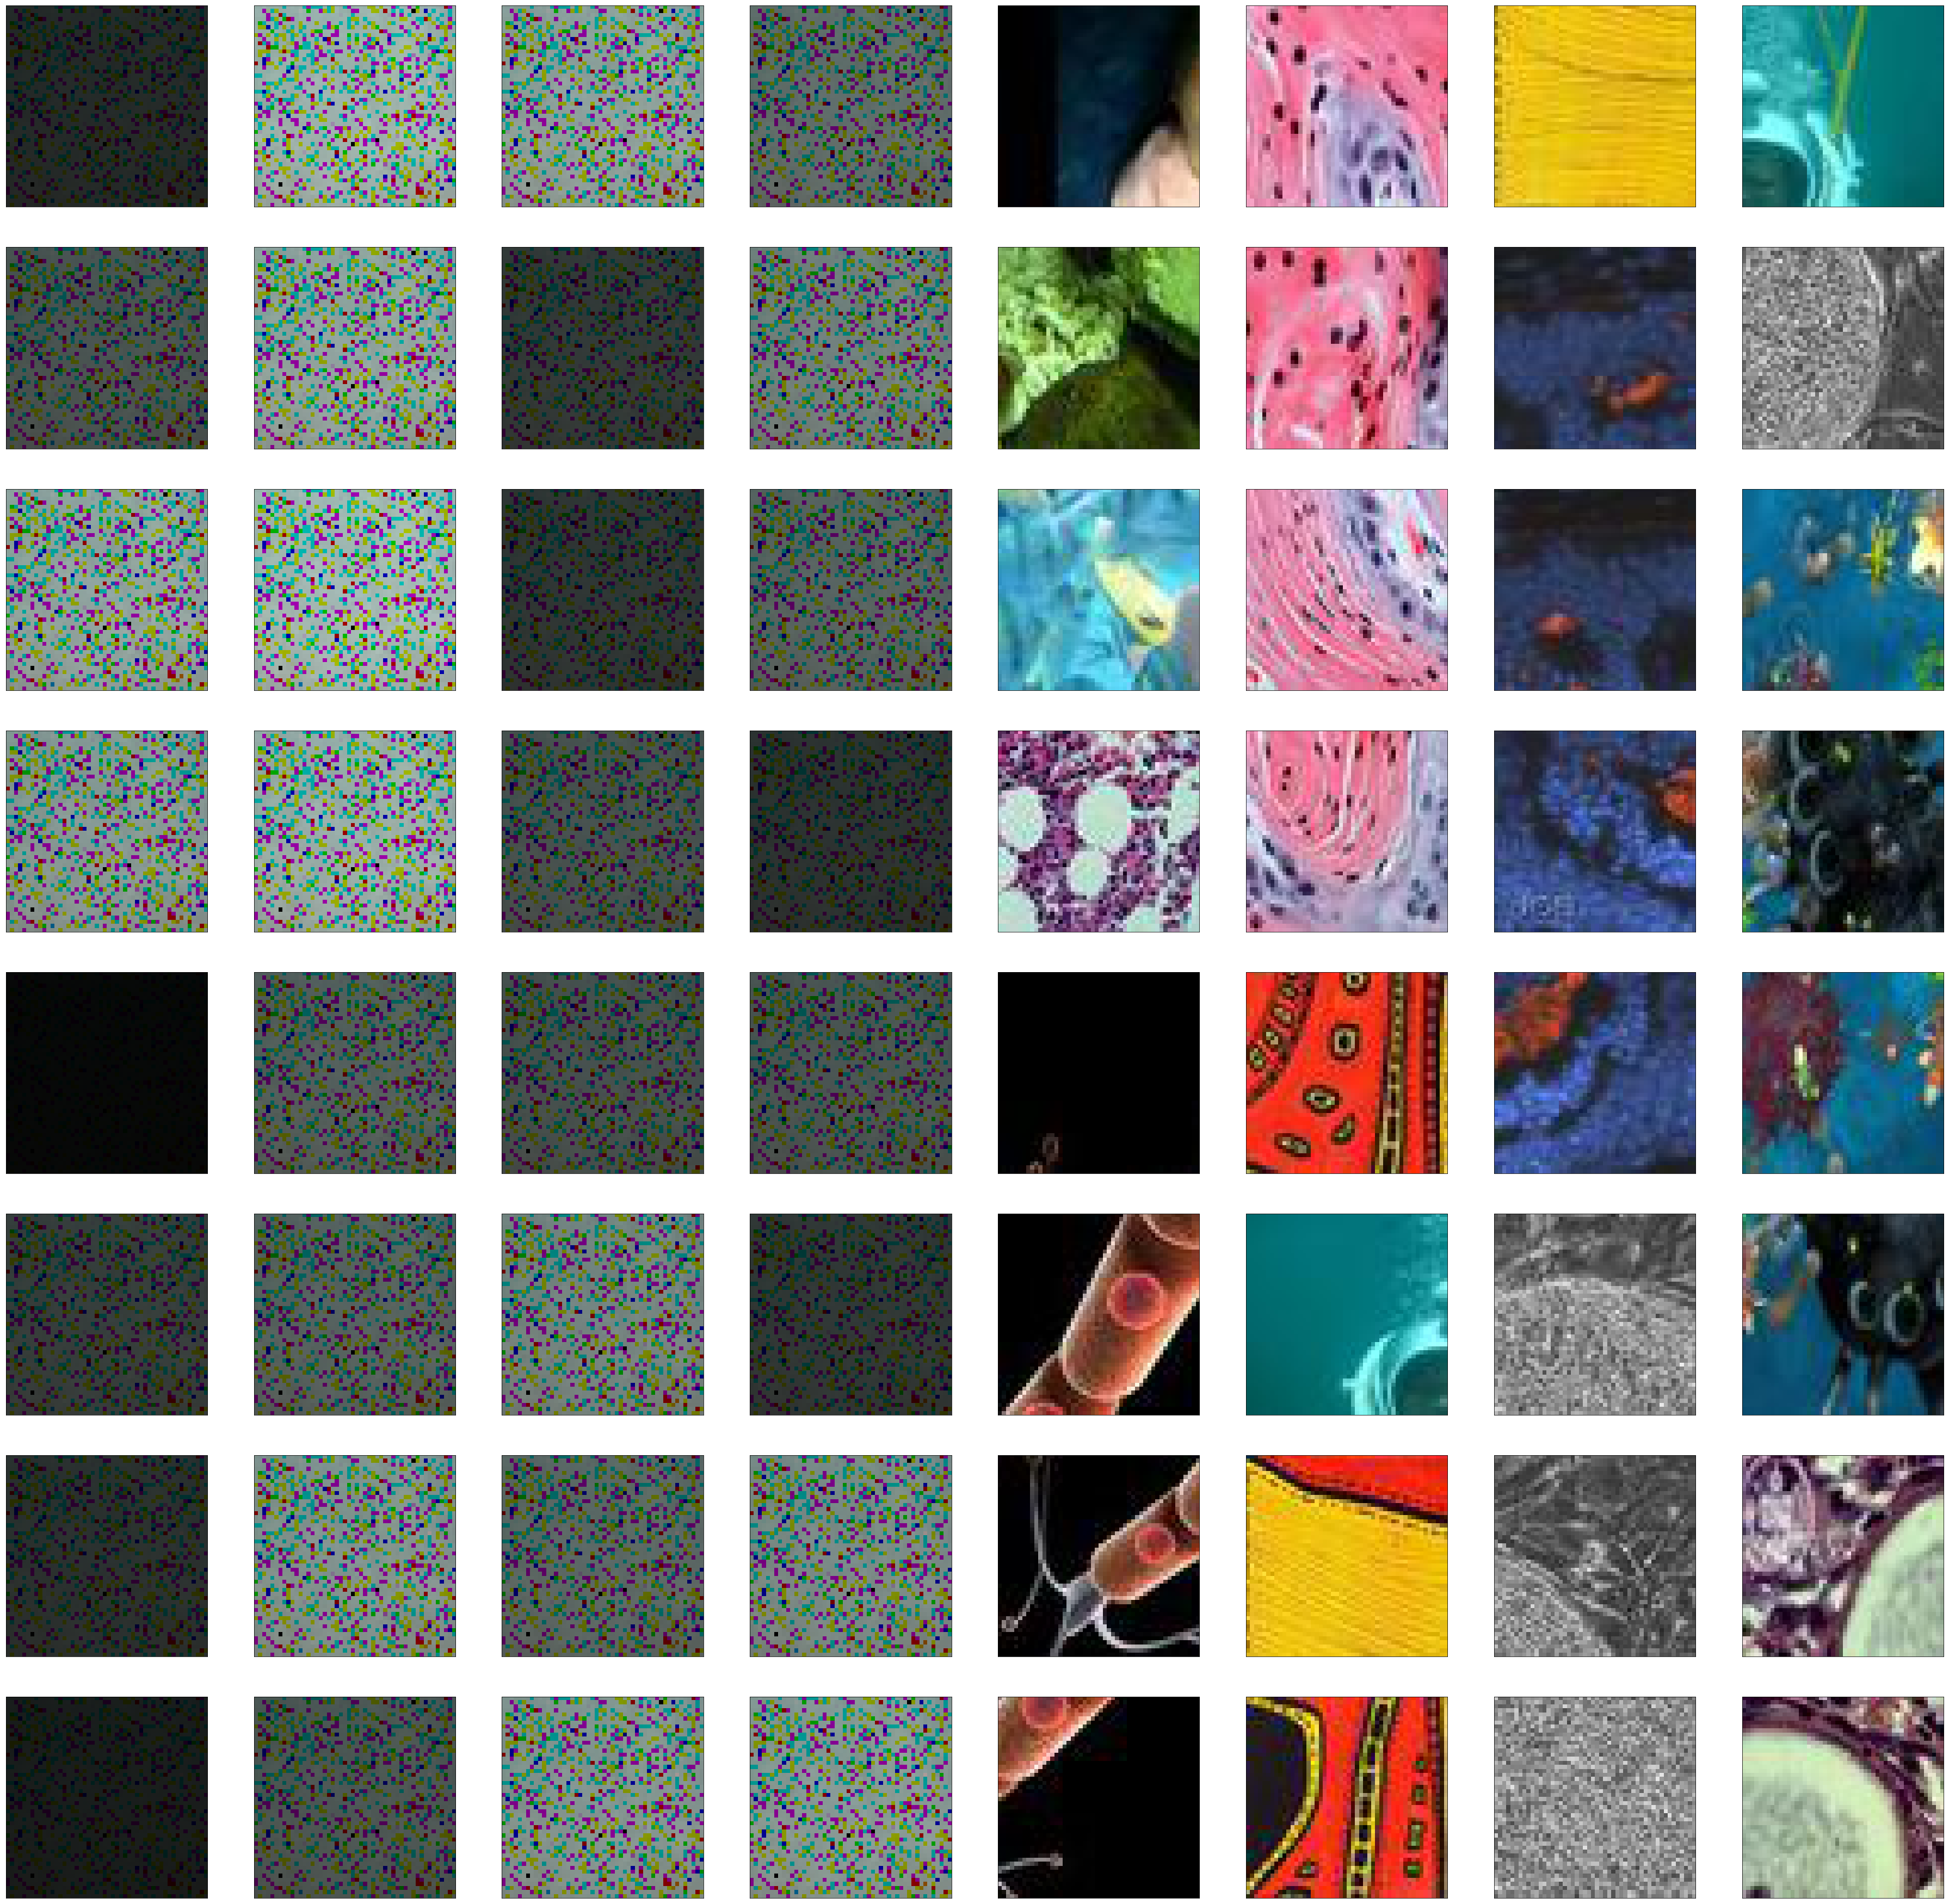

In [9]:
def combine_images(path,filenamelist):
    result = Image.new("RGB", (256, 256))
    for i in range(len(filenamelist)):
        filename = filenamelist[i]
        img = Image.open(path+os.sep+filename)
        img.thumbnail((32,32), Image.ANTIALIAS)
        h = i // 8
        w = (i+1) % 8
        area = ((w-1)*32, h*32, w*32, (h+1)*32)
        result.paste(img, area)
    return result

def predict():
    out_imgs = model.predict(x_train)

    n = 8

    plt.figure(figsize=(64, 64))
    k = 0
    l = 0
    for j in range(n):
        for i in range(n):
            ax = plt.subplot(8,8, j + 1 + 8*i)
            if k < 32:
                plt.imshow(out_imgs[k].reshape(50,50,3))
                k += 1
            else:
                plt.imshow(y_train[l].reshape(50,50,3))
                l += 1
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)
            
    plt.show()
predict()

In [7]:
def no():
    import csv
    import numpy as np
    start = time()
    X = np.loadtxt('data/cropped16.csv', delimiter=',', dtype=np.float32)
    Y = np.loadtxt('data/cropped50.csv', delimiter=',', dtype=np.float32)
    print('file loaded')
    print('Job completed in: {} seconds'.format(time()-start))
    X.shape = (-1,3,256)
    Y.shape = (-1,3,2500)
    iinput = open('data/cropped16.csv', "w")
    output = open('data/cropped50.csv', "w")
    writer1 = csv.writer(iinput, lineterminator='\n')
    writer2 = csv.writer(output, lineterminator='\n')

    for i in range(len(X)):
        x = X[i].T #(256,3)
        y = Y[i].T
        writer1.writerows(x)
        writer2.writerows(y)

    print('finished writing')
    print('Job completed in: {} seconds'.format(time()-start))
    iinput.close()
    output.close()

file loaded
Job completed in: 35.07176065444946 seconds
finished writing
Job completed in: 82.23845720291138 seconds
